In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression #Logistic Regression is a Machine Learning classification algorithm
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("D:/iNeuron/zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [5]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
df.count()

url                            51717
address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           43942
votes                          51717
phone                          50509
location                       51696
rest_type                      51490
dish_liked                     23639
cuisines                       51672
approx_cost(for two people)    51371
reviews_list                   51717
menu_item                      51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Descreptive Statistics

In [8]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [9]:

df.describe(include='all')

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/sweet-melts-j...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Display complete meta-data of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Handling Duplicate

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [12]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [13]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Drop unwanted column

In [14]:
df.drop(['url','phone','dish_liked','address','menu_item'],axis=1, inplace=True)

In [15]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [18]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7757
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [19]:
df.describe()

,votes
count,51645.000000
mean,283.968555
std,804.317863
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


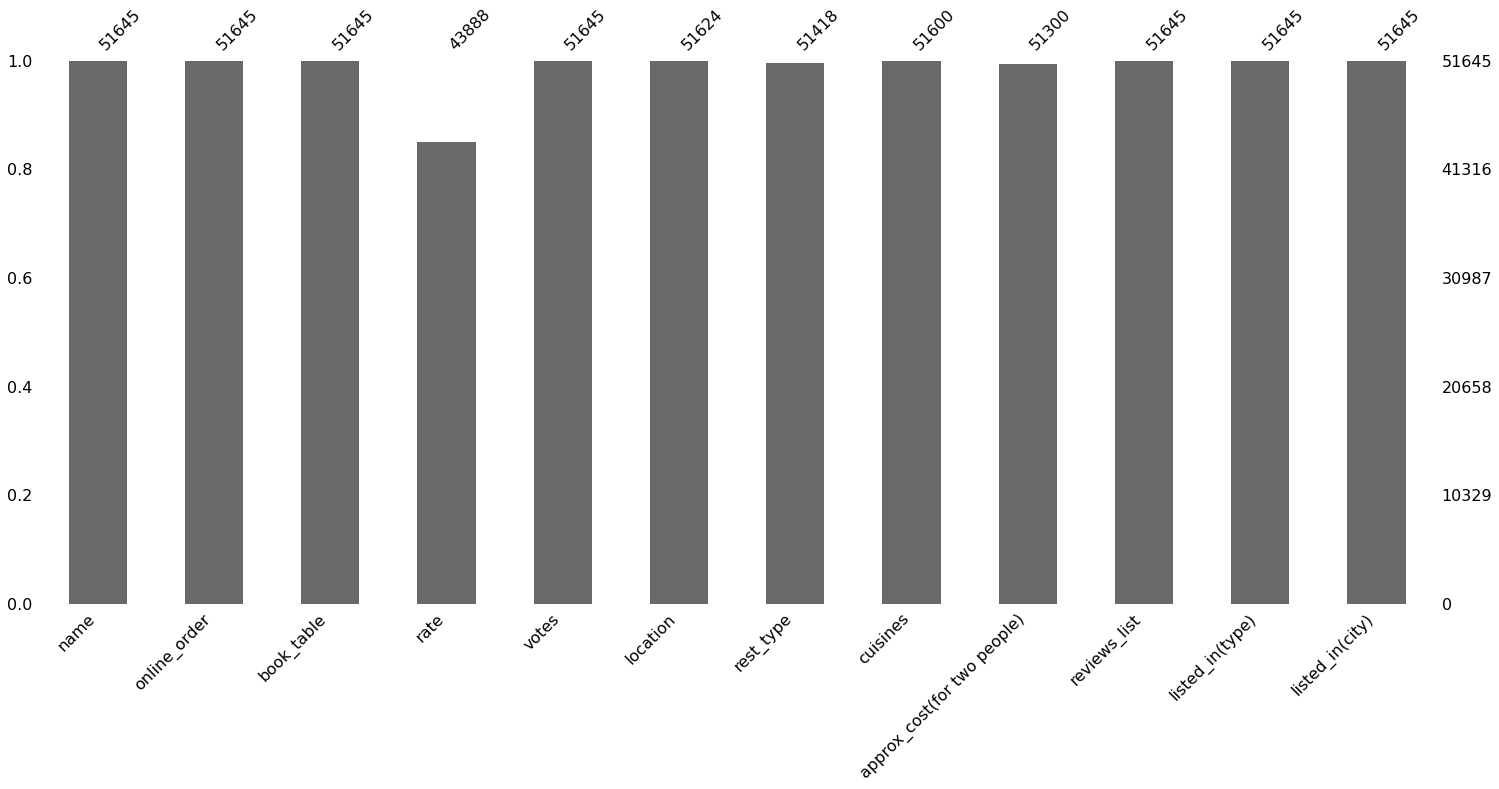

In [20]:
import missingno as msno
msno.bar(df)
plt.show()

In [21]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [22]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [23]:
df.dropna()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [24]:
df.shape

(51645, 12)

# change name of columns


In [25]:
df=df.rename(columns={'approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City','reviews_list':'Review'})

df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost', 'Review', 'Type', 'City'],
      dtype='object')

In [26]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [27]:
df.dtypes

name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
Cost            object
Review          object
Type            object
City            object
dtype: object

In [28]:
df['Cost'].unique()



###  unique value count???

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [29]:
df['Cost'].nunique()

70

# Type Conversion 
### because the cost is in str so we have convert it into int


In [30]:
#Some transformations
df['Cost']=  df['Cost'].astype(str)
df['Cost'] = df['Cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
df['Cost'] = df['Cost'].astype(float)

In [31]:
df['Cost'].unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,  80.  ,
         1.1 , 160.  ,   1.6 , 230.  , 130.  ,  50.  , 190.  ,   1.7 ,
          nan,   1.4 , 180.  ,   1.35,   2.2 ,   2.  ,   1.8 ,   1.9 ,
       330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,   3.4 ,  40.  ,   1.25,
         3.5 ,   4.  ,   2.4 ,   2.6 , 120.  ,   1.45, 469.  ,  70.  ,
         3.2 ,  60.  , 560.  , 240.  , 360.  ,   6.  ,   1.05,   2.3 ,
         4.1 ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 , 140.  ])

In [32]:
C_mean=df['Cost'].mean()

In [33]:
df['Cost'].fillna(value=C_mean, inplace=True)

In [34]:
df['Cost'] = df['Cost'].astype(int)

C:\Users\91701\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cost', ylabel='Density'>

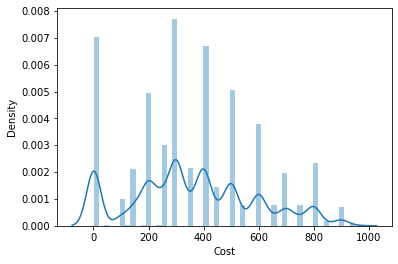

In [35]:
sns.distplot(df['Cost'])

In [36]:
#Removing '/5' from Rates
df['rate'].unique()
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

<ipython-input-36-ee1628f193b4>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [37]:
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [38]:
df.rate.nunique()

31

C:\Users\91701\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

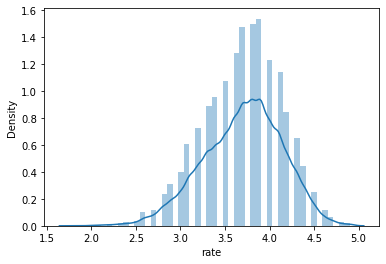

In [39]:
sns.distplot(df['rate'])

In [40]:
df.rate.skew()

-0.32908386580794874

In [41]:
meanVal = df['rate'].mean()
meanVal

3.700526164047854

In [42]:
df['rate'].fillna(value=meanVal, inplace=True)

In [43]:
df.tail()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type,City
49374,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,1,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
49375,Vinod Bar And Restaurant,No,No,3.700526,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars,Whitefield
49376,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700526,0,Whitefield,Bar,Finger Food,2,[],Pubs and bars,Whitefield
49377,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield
49378,The Nest - The Den Bengaluru,No,No,3.400000,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental",1,"[('Rated 5.0', 'RATED\n Great ambience , look...",Pubs and bars,Whitefield


# detect outliers

In [44]:
P0=df.Cost.min()

In [45]:
P100=df.Cost.max()

In [46]:
q1=df.Cost.quantile(.25)

In [47]:
q2=df.Cost.quantile(.5)

In [48]:
q3=df.Cost.quantile(.75)

In [49]:
IQR=q3-q1

In [50]:
LC=q1-1.5*IQR

In [51]:
UC=q3+1.5*IQR

In [52]:
if LC<P0:
    print('No outlier on lower side')
else:
    print('outlier on lower side')
if UC>P100:
    print('No outliers on Higher side')
else:
    print('outliers on Higher side')

No outlier on lower side
outliers on Higher side


In [53]:
print('P0=',P0,'P100=',P100,'q1=',q1,'q2=',q2,'q3=',q3,'IQR=',IQR,'LC=',LC,'UC=',UC)

P0= 1 P100= 950 q1= 200.0 q2= 350.0 q3= 500.0 IQR= 300.0 LC= -250.0 UC= 950.0


In [54]:
n = len(pd.unique(df['Cost']))
print(n)

40


In [55]:
group_by = df.groupby('Cost')['online_order'].nunique
print(group_by)

<bound method SeriesGroupBy.nunique of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001F94DD19D90>>


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

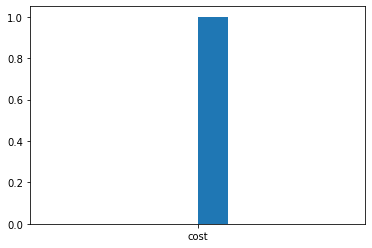

In [56]:
plt.hist(x='cost',data=df)

Text(0.5, 0, 'ONLINE ORDER')

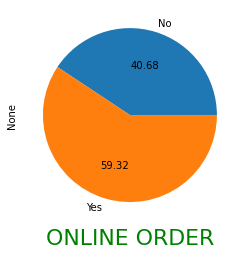

In [57]:
df.groupby('online_order').size().plot(kind='pie', autopct='%.2f').set_xlabel('ONLINE ORDER', size=22,color='g')

Text(0.5, 0, 'BOOK TABLE')

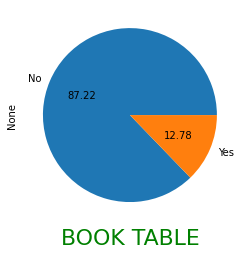

In [58]:
df.groupby('book_table').size().plot(kind='pie', autopct='%.2f').set_xlabel('BOOK TABLE', size=22,color='g')

In [59]:
mean=df.rate.mean()
median=df.rate.median()
mode=df.rate.mode()
print(mean,median,mode)


3.700526164048031 3.700526164047854 0    3.700526
dtype: float64


In [60]:
df.rate.skew()

-0.35843780111312784

In [61]:
df['Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

<AxesSubplot:xlabel='Type', ylabel='count'>

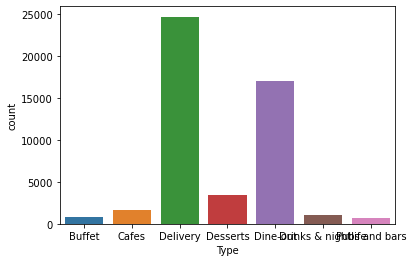

In [62]:
sns.countplot(x='Type',data=df)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49379 entries, 0 to 49378
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          49379 non-null  object 
 1   online_order  49379 non-null  object 
 2   book_table    49379 non-null  object 
 3   rate          49379 non-null  float64
 4   votes         49379 non-null  int64  
 5   location      49358 non-null  object 
 6   rest_type     49154 non-null  object 
 7   cuisines      49334 non-null  object 
 8   Cost          49379 non-null  int32  
 9   Review        49379 non-null  object 
 10  Type          49379 non-null  object 
 11  City          49379 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 4.3+ MB


In [64]:
df['rate'].nunique()

32

In [65]:
df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70052616, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [66]:
df.rate.nunique()

32

In [67]:
print(df['rate'].value_counts())

3.700526    7757
3.900000    3968
3.800000    3870
3.700000    3816
3.600000    3312
4.000000    3182
4.100000    2944
3.500000    2781
3.400000    2472
3.300000    2305
4.200000    2183
3.200000    1867
4.300000    1691
3.100000    1561
4.400000    1147
3.000000    1022
2.900000     802
4.500000     656
2.800000     600
2.700000     307
4.600000     300
2.600000     260
4.700000     167
2.500000     101
2.400000      70
4.800000      66
4.900000      55
2.300000      51
2.200000      26
2.100000      24
2.000000      11
1.800000       5
Name: rate, dtype: int64


In [68]:
print(df['Cost'].value_counts())

300    7095
400    6280
1      5788
500    4759
200    4494
600    3557
250    2799
800    2161
150    1944
700    1896
350    1703
450    1378
100     929
650     771
750     750
550     750
2       738
900     690
360     341
3       203
850     153
950      60
4        35
120      24
180      20
230      10
40        8
50        8
130       8
80        7
199       4
330       4
190       2
140       2
240       2
6         2
469       1
60        1
5         1
70        1
Name: Cost, dtype: int64


In [69]:
df.Cost.nunique()

40

# Univariate Plot

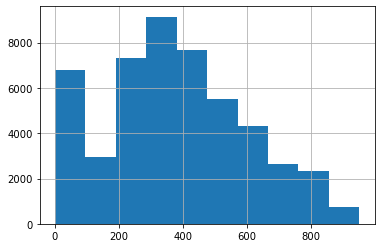

In [70]:
df.Cost.hist()
plt.show()

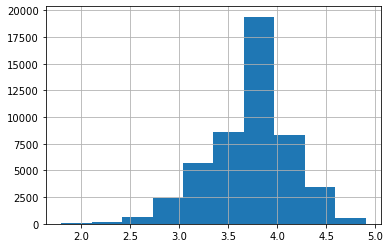

In [71]:
df.rate.hist()
plt.show()

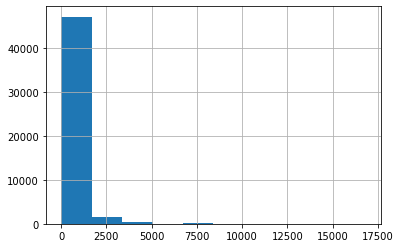

In [72]:
df.votes.hist()
plt.show()

<AxesSubplot:>

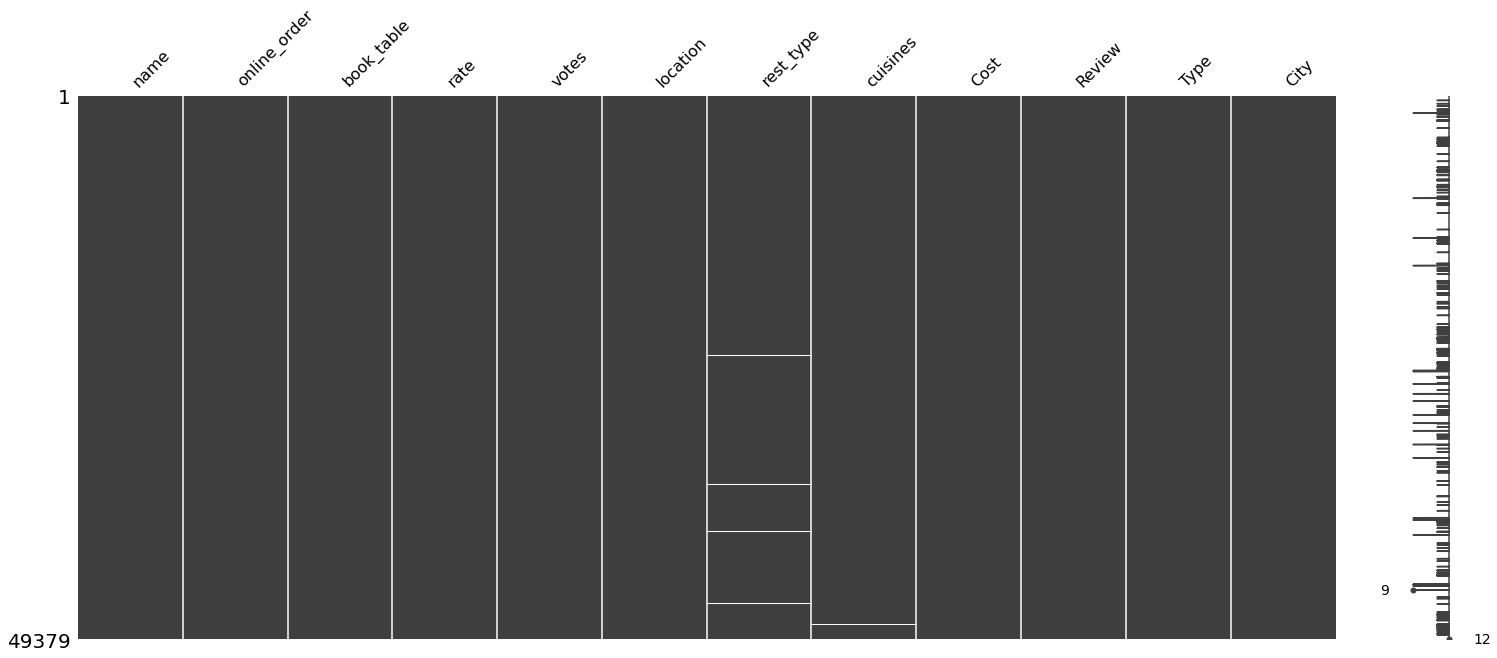

In [73]:
msno.matrix(df)

In [74]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [75]:
df.name.nunique()

8458

In [76]:
df.shape

(49379, 12)

<AxesSubplot:ylabel='Frequency'>

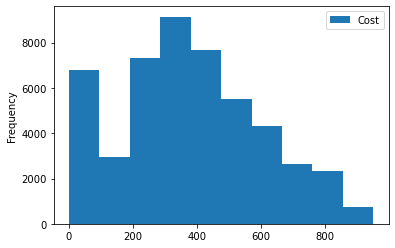

In [77]:
df.plot(x='rate',y='Cost',kind='hist')

<AxesSubplot:ylabel='Frequency'>

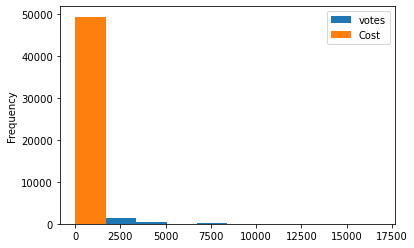

In [78]:
df.plot(x='rate',kind='hist')

In [79]:
df.rate.nunique()

32

In [80]:
df.rate.unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70052616, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [81]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
Cost              int32
Review           object
Type             object
City             object
dtype: object

C:\Users\91701\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


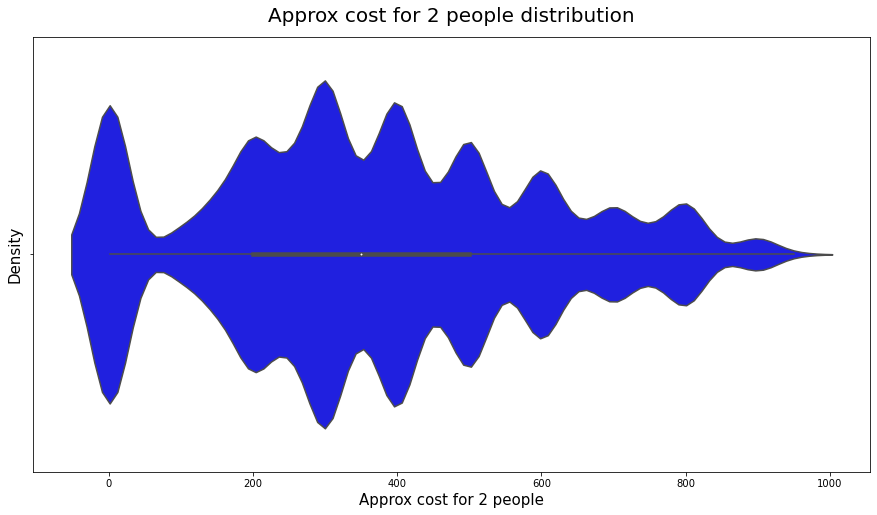

In [82]:
plt.figure(figsize=(15,8))
sns.violinplot(df.Cost,color='b')
plt.title('Approx cost for 2 people distribution', size = 20, pad = 15)
plt.xlabel('Approx cost for 2 people',size = 15)
plt.ylabel('Density',size = 15)
plt.show()

In [83]:
df.Cost.unique()

array([800, 300, 600, 700, 550, 500, 450, 650, 400, 900, 200, 750, 150,
       850, 100,   1, 350, 250, 950, 199, 230, 130,  80,  50, 190, 360,
       180,   2, 330,   3,  40,   4, 120, 469,  70,  60, 240,   6,   5,
       140])

# Detect outliers


In [84]:
P0=df.Cost.min()

In [85]:
P100=df.Cost.max()

In [86]:
q1=df.Cost.quantile(.25)

In [87]:
q2=df.Cost.quantile(.5)

In [88]:
q3=df.Cost.quantile(.75)

In [89]:
IQR=q3-q1

In [90]:
LC=q1-1.5*IQR

In [91]:
UC=q3+1.5*IQR

In [92]:
if LC<P0:
    print('No outlier on lower side')
else:
    print('outlier on lower side')
if UC>P100:
    print('No outliers on Higher side')
else:
    print("outliers on Higher side")
    


No outlier on lower side
outliers on Higher side


In [93]:
print('P0=',P0,'P100=',P100,'q1=',q1,'q2=',q2,'q3=',q3,'IQR=',IQR,'LC=',LC,'UC=',UC)

P0= 1 P100= 950 q1= 200.0 q2= 350.0 q3= 500.0 IQR= 300.0 LC= -250.0 UC= 950.0


In [94]:
meanVal = df['Cost'].mean()
meanVal

361.27392211263896

In [95]:
df.Cost.unique()

array([800, 300, 600, 700, 550, 500, 450, 650, 400, 900, 200, 750, 150,
       850, 100,   1, 350, 250, 950, 199, 230, 130,  80,  50, 190, 360,
       180,   2, 330,   3,  40,   4, 120, 469,  70,  60, 240,   6,   5,
       140])

In [96]:
df['Cost'].fillna(value=meanVal, inplace=True)

In [97]:
df.Cost.isnull().sum()

0

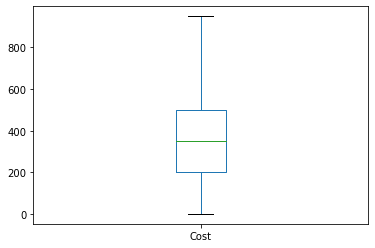

In [98]:
df.Cost.plot(kind='box')
plt.show()

In [99]:
df.head(15)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",Cafes,Banashankari


In [100]:
df.rate.unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70052616, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [101]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
Cost              int32
Review           object
Type             object
City             object
dtype: object

In [102]:
df['rate'].unique()
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x

In [103]:
df.rate.tail(15)

49364    4.000000
49365    3.900000
49366    4.000000
49367    3.800000
49368    3.700000
49369    3.900000
49370    2.800000
49371    3.700000
49372    3.700526
49373    2.500000
49374    3.600000
49375    3.700526
49376    3.700526
49377    4.300000
49378    3.400000
Name: rate, dtype: float64

In [104]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
Cost              int32
Review           object
Type             object
City             object
dtype: object

In [105]:
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type,City
0,Jalsa,True,True,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,True,False,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,True,False,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,False,False,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
49374,Best Brews - Four Points By Sheraton Bengaluru...,False,False,3.600000,27,Whitefield,Bar,Continental,1,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
49375,Vinod Bar And Restaurant,False,False,3.700526,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars,Whitefield
49376,Plunge - Sheraton Grand Bengaluru Whitefield H...,False,False,3.700526,0,Whitefield,Bar,Finger Food,2,[],Pubs and bars,Whitefield
49377,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [106]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'Cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

In [107]:
df_en.tail(15)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type,City
49364,3608,1,1,4.000000,1094,29,17,1384,1,22068,6,29
49365,3239,0,0,3.900000,548,29,29,1295,1,22069,6,29
49366,2854,1,0,4.000000,189,29,44,1163,1,21878,6,29
49367,3432,0,0,3.800000,128,29,36,1340,1,4467,6,29
49368,8335,1,1,3.700000,27,29,11,212,1,21898,6,29
49369,3031,1,1,3.900000,77,29,72,248,2,3941,6,29
49370,3035,1,1,2.800000,161,29,30,1212,1,3944,6,29
49371,3234,1,1,3.700000,34,29,30,212,800,4252,6,29
49372,8340,1,1,3.700526,0,29,17,248,900,21910,6,29
49373,2030,1,1,2.500000,81,29,30,833,800,22049,6,29


In [108]:
df.drop(['name'],axis=1, inplace=True)

In [109]:
df_en 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type,City
0,0,0,0,4.100000,775,0,0,0,800,0,0,0
1,1,0,1,4.100000,787,0,0,1,800,1,0,0
2,2,0,1,3.800000,918,0,1,2,800,2,0,0
3,3,1,1,3.700000,88,0,2,3,300,3,0,0
4,4,1,1,3.800000,166,1,0,4,600,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49374,8344,1,1,3.600000,27,29,17,251,1,21918,6,29
49375,8349,1,1,3.700526,0,29,17,248,600,89,6,29
49376,8409,1,1,3.700526,0,29,17,248,2,89,6,29
49377,8405,1,0,4.300000,236,62,17,248,2,22021,6,29


In [110]:
mean=df.rate.mean()
median=df.rate.median()
mode=df.rate.mode()

In [111]:
print(mean,median,mode)

3.700526164048031 3.700526164047854 0    3.700526
dtype: float64


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost', 'Review', 'Type', 'City'],
      dtype='object')

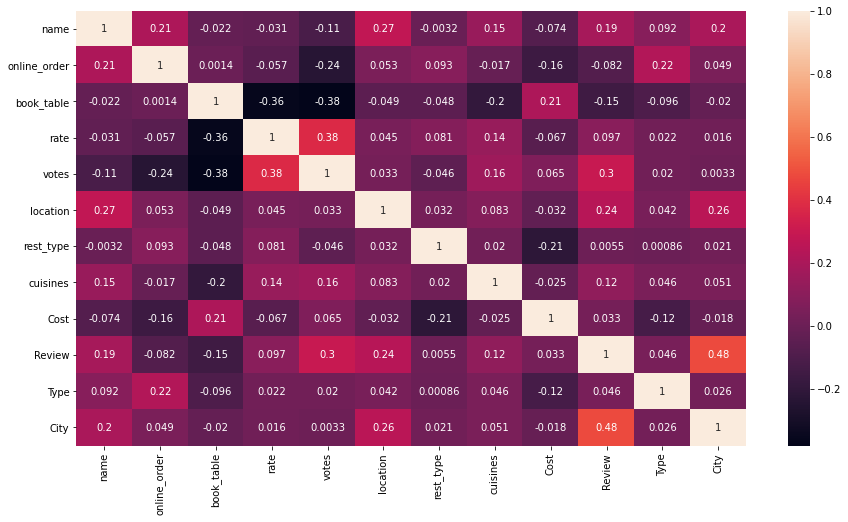

In [112]:
corr = df_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_en.columns

In [113]:
df_en.dtypes

name              int64
online_order      int64
book_table        int64
rate            float64
votes             int64
location          int64
rest_type         int64
cuisines          int64
Cost              int32
Review            int64
Type              int64
City              int64
dtype: object

In [128]:
#Defining X and Y for model, Train-test split
x = df_en[["online_order","book_table","votes","location","rest_type","cuisines","Cost","Type"]]
y = df_en['rate']
#Getting Test and Training Set, change test_size to change the train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
x_train.shape, y_train.shape

((39503, 8), (39503,))

In [115]:
df_en.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
Cost            0
Review          0
Type            0
City            0
dtype: int64

In [129]:
#Prepare a Linear REgression Model
L=LinearRegression()
L.fit(x_train,y_train)
y_pred=L.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2690876252369221

In [130]:
y_test.shape

(9876,)

In [131]:
y_pred.shape

(9876,)

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
accuracy_score(y_test,y_pred)

ValueError: continuous is not supported

In [126]:
from sklearn.metrics import confusion_matrix

In [134]:
confusion_matrix(y_test, y_pred)

ValueError: continuous is not supported

In [127]:
df_en1=df_en.dropna(subset=['rate'])

In [ ]:
df_en1

# Decision Tree

In [ ]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

In [ ]:
y_predict

In [ ]:
y_test.shape

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_predict)

In [ ]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 15, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)

In [ ]:
pip install pandas-profiling

In [ ]:
df_en['Cost'<100]